> # scikit-learn 간단하게 살펴보기

- 앞서 더미 데이터 생성을 위해 scikit-learn을 사용해 왔으나, 이번 절에서는 학습과 추론까지 scikit-learn으로 수행

In [1]:
from sklearn.datasets import make_blobs

In [3]:
### 데이터 생성
X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
### 로지스틱 회귀 모델 인스턴스 만들기
classifier = LogisticRegression()

### 학습하기
classifier.fit(X_dataset, y_dataset)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- `sklearn.linear_model` 모듈 내부에 `LogisticRegression()`으로 인스턴스 생성 가능
- 학습하고자 하는 데이터셋을(`(X_dataset, y_dataset)`) `.fit()`의 매개변수로 넣어서 학습

In [6]:
### 추론
test_data = [[0.1, 0.1],
            [-0.5, 0.0]]

classifier.predict(test_data)

array([1, 0])

- 추론은 좌표를 `.predict()`의 매개변수로 수행
- 결과 값은 추정 레이블을 반환

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
def plot_boundary(w):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x + %f' % ((-w[1] / (w[2]+1e-6)), (-w[0]/(w[2]+1e-6))))
  plt.plot(x, y, linewidth = 2)
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

In [15]:
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


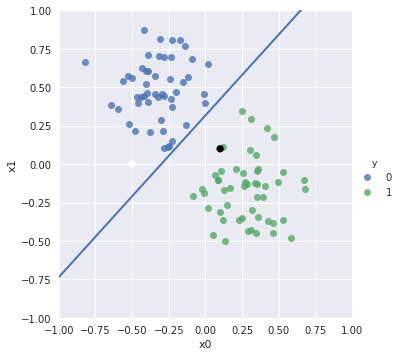

In [36]:
plot_scatter()
plot_boundary(w = w)
plt.scatter([0.1, -0.5], [0.1, 0], c = [1,0])